In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import seaborn as sns

#Upload from csv
data_set_path = "Maternal Health Risk Data Set.csv"
#Read data and results
data_df = pd.read_csv(data_set_path)

data_df.head(20)




,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [2]:
data_df.shape

(1014, 7)

In [3]:
#Check Data Types
data_df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [4]:
# Check for null values
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
#List of all columns
data_df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [6]:
data_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
# Define statistical count
statistical_count = data_df.describe()

# Calculate quartiles, IQR, outliers, min, and max for each feature
for i in statistical_count.columns:
    # Quartiles
    q1 = statistical_count.loc['25%', i]
    q2 = statistical_count.loc['50%', i]
    q3 = statistical_count.loc['75%', i]
    
    # Interquartile Range (IQR)
    iqr = q3 - q1
    
    # Outlier range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Outliers
    outliers = data_df[(data_df[i] < lower_bound) | (data_df[i] > upper_bound)][i]
    
    # Minimum and Maximum
    minimum = statistical_count.loc['min', i]
    maximum = statistical_count.loc['max', i]
    
    # Print results
    print(f"Statistics for {i}:")
    print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Outliers: {outliers.tolist()}")
    print(f"Minimum: {minimum}, Maximum: {maximum}")
    print("\n")


Statistics for Age:
Q1: 19.0, Q2: 26.0, Q3: 39.0
IQR: 20.0
Lower Bound: -11.0, Upper Bound: 69.0
Outliers: [70]
Minimum: 10.0, Maximum: 70.0


Statistics for SystolicBP:
Q1: 100.0, Q2: 120.0, Q3: 120.0
IQR: 20.0
Lower Bound: 70.0, Upper Bound: 150.0
Outliers: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160]
Minimum: 70.0, Maximum: 160.0


Statistics for DiastolicBP:
Q1: 65.0, Q2: 80.0, Q3: 90.0
IQR: 25.0
Lower Bound: 27.5, Upper Bound: 127.5
Outliers: []
Minimum: 49.0, Maximum: 100.0


Statistics for BS:
Q1: 6.9, Q2: 7.5, Q3: 8.0
IQR: 1.0999999999999996
Lower Bound: 5.250000000000001, Upper Bound: 9.649999999999999
Outliers: [15.0, 13.0, 11.0, 18.0, 11.0, 15.0, 18.0, 12.0, 16.0, 12.0, 15.0, 15.0, 11.0, 15.0, 18.0, 17.0, 15.0, 15.0, 18.0, 15.0, 11.0, 15.0, 19.0, 18.0, 15.0, 19.0, 11.0, 19.0, 18.0, 15.0, 11.0, 15.0, 19.0, 16.0, 11.0, 12.0, 12.0, 19.0, 18.0, 15.0, 11.0, 15.0, 19.0, 16.0, 15.0, 10.0, 11.0, 17.0, 15.0, 11.0, 15.0, 18.0, 11.0, 12.0, 11.0, 11.0, 13.0, 15.0, 19.0, 18.0, 15.0

<Figure size 1200x800 with 0 Axes>

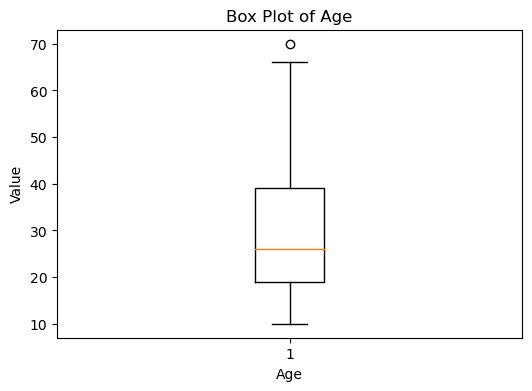

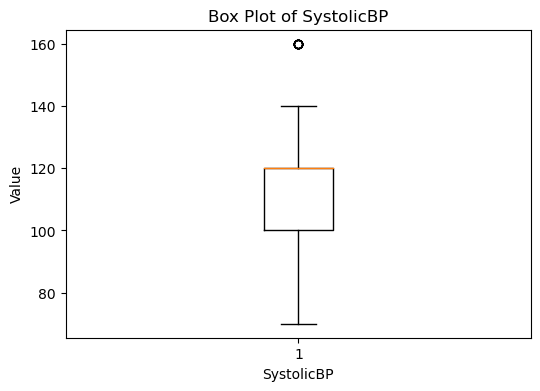

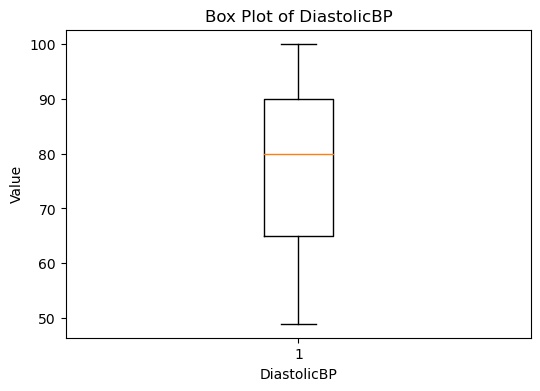

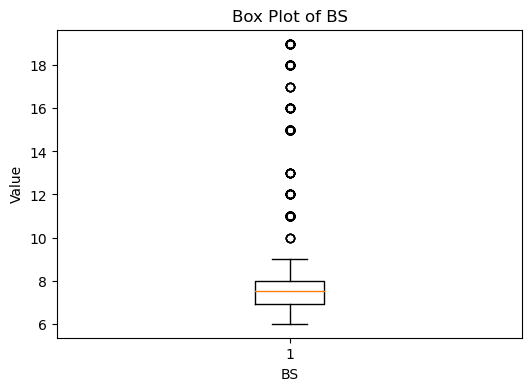

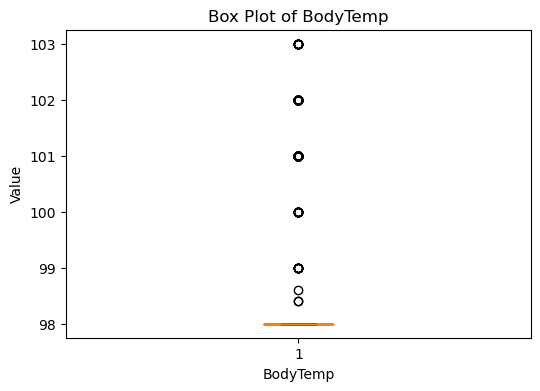

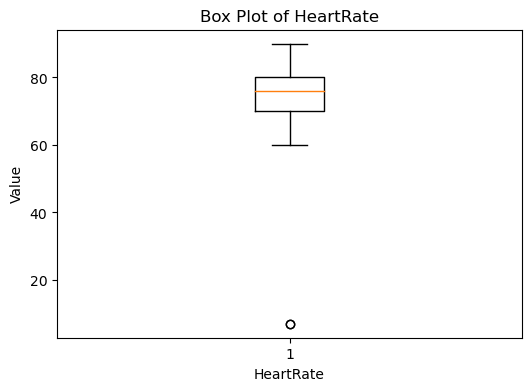

In [8]:
import matplotlib.pyplot as plt

# Define statistical features
statistical_features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Plot box plots for each numerical feature
plt.figure(figsize=(12, 8))
for i in range(len(statistical_features)):
    plt.figure(figsize=(6, 4))
    plt.boxplot(data_df[statistical_features[i]])
    plt.title(f'Box Plot of {statistical_features[i]}')
    plt.xlabel(statistical_features[i])  
    plt.ylabel('Value')
    plt.show()


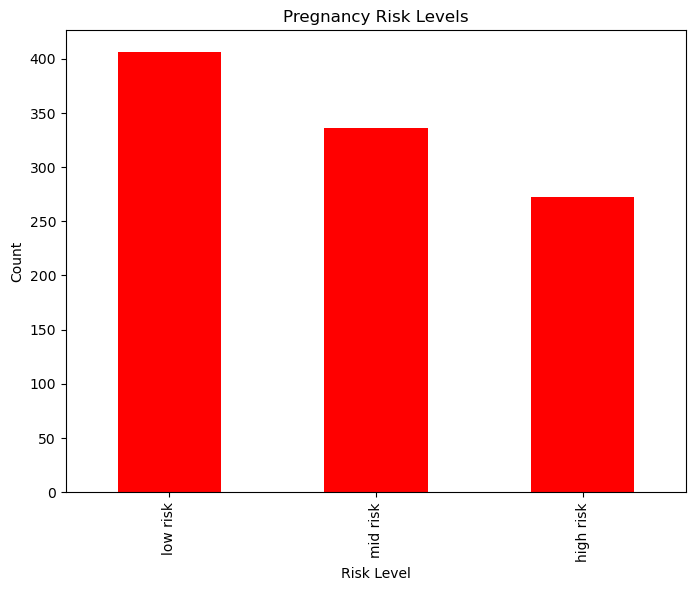

In [9]:
# Count the occurrences of each risk level
risk_counts = data_df['RiskLevel'].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 6))
risk_counts.plot(kind='bar', color='r')

# Adding labels and title
plt.title('Pregnancy Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')

# Show plot
plt.show()


In [10]:
# Count the occurrences of each risk level
risk_counts = data_df['RiskLevel'].value_counts()
risk_counts

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [11]:
# Replace risk levels with numeric values
#data_df['RiskLevels'] = data_df['RiskLevel'].replace({"low risk": 0, "mid risk": 1, "high risk": 2})
#data_df.head()

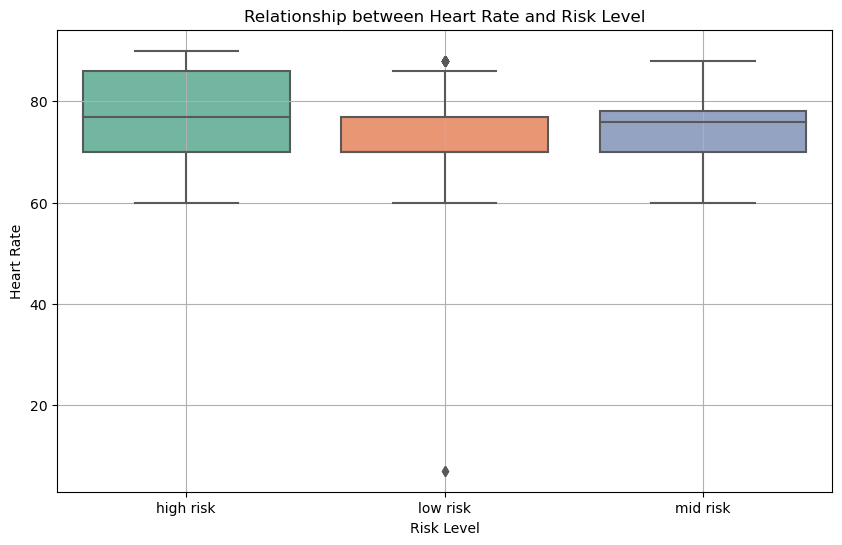

In [12]:
# Box plot of HeartRate vs. RiskLevel
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='HeartRate', data=data_df, palette='Set2')
plt.xlabel('Risk Level')
plt.ylabel('Heart Rate')
plt.title('Relationship between Heart Rate and Risk Level')
plt.grid(True)
plt.show()


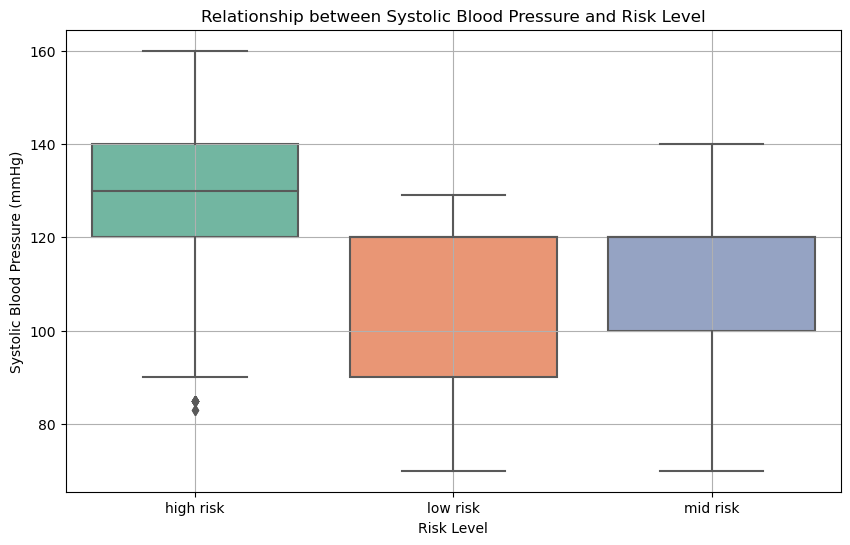

In [13]:
# Box plot of SystolicBP vs. RiskLevel
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='SystolicBP', data=data_df, palette='Set2')
plt.xlabel('Risk Level')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('Relationship between Systolic Blood Pressure and Risk Level')
plt.grid(True)
plt.show()


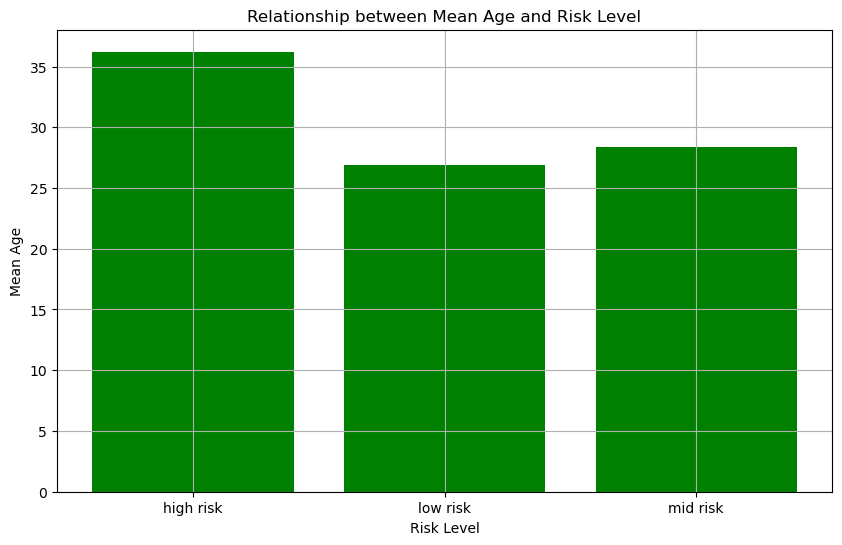

In [17]:
# Calculate the mean age for each risk level
mean_age = data_df.groupby('RiskLevel')['Age'].mean().reset_index()

# Create a bar plot showing the relationship between Age and Risk Level
plt.figure(figsize=(10, 6))
plt.bar(mean_age['RiskLevel'], mean_age['Age'], color='g')

# Add labels and title
plt.xlabel('Risk Level')
plt.ylabel('Mean Age')
plt.title('Relationship between Mean Age and Risk Level')

# Show plot
plt.grid(True)
plt.show()

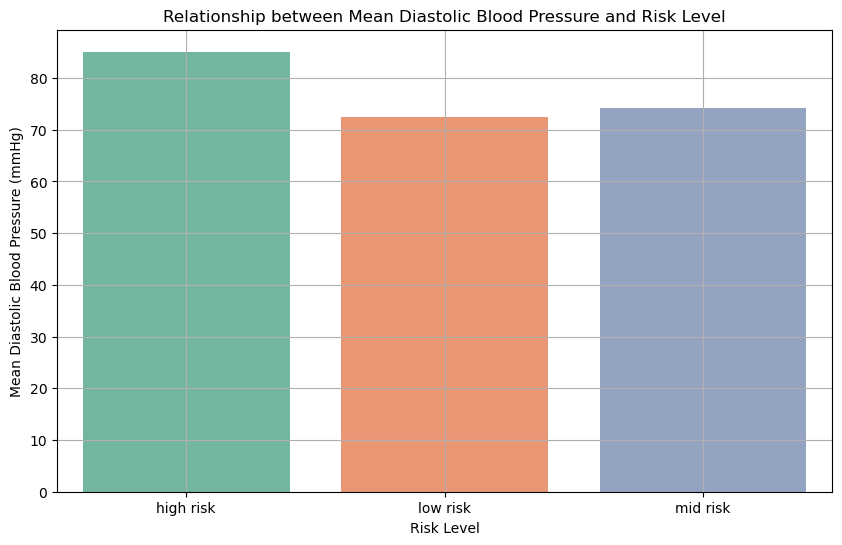

In [18]:
# Calculate the mean Diastolic BP for each risk level
mean_diastolic_bp = data_df.groupby('RiskLevel')['DiastolicBP'].mean().reset_index()

# Create a bar plot showing the relationship between Diastolic Blood Pressure and Risk Level
plt.figure(figsize=(10, 6))
sns.barplot(x='RiskLevel', y='DiastolicBP', data=mean_diastolic_bp, palette='Set2')

# Add labels and title
plt.xlabel('Risk Level')
plt.ylabel('Mean Diastolic Blood Pressure (mmHg)')
plt.title('Relationship between Mean Diastolic Blood Pressure and Risk Level')

# Show plot
plt.grid(True)
plt.show()


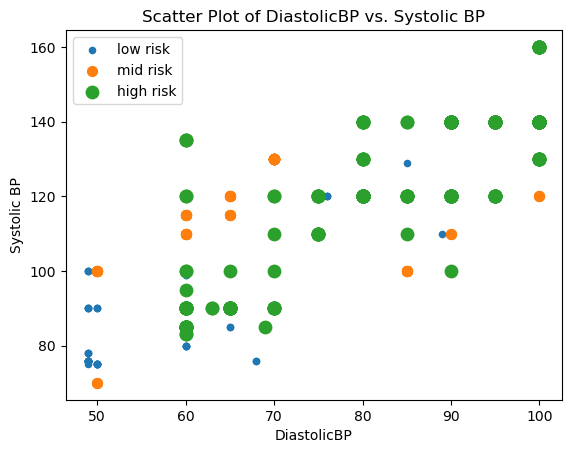

In [30]:
# Define marker size based on risk level
marker_sizes = {"low risk": 20, "mid risk": 50, "high risk": 80}

# Plot scatter plot for all risk levels
for risk_level, marker_size in marker_sizes.items():
    risk_data = data_df[data_df["RiskLevel"] == risk_level]
    plt.scatter(risk_data["DiastolicBP"], risk_data["SystolicBP"], label=risk_level, s=marker_size)

plt.xlabel('DiastolicBP')
plt.ylabel('Systolic BP')
plt.title('Scatter Plot of DiastolicBP vs. Systolic BP')
plt.legend()
plt.show()


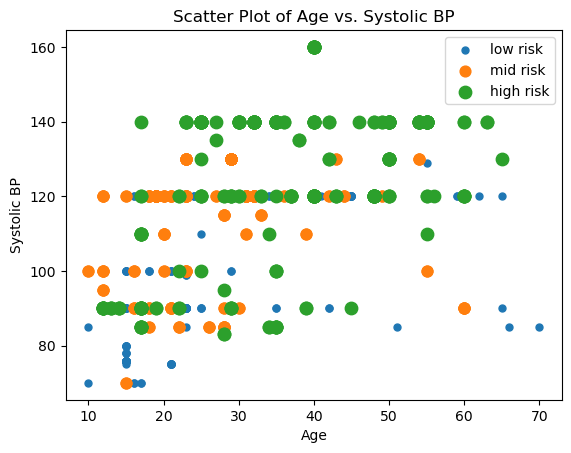

In [32]:
# Define marker size based on risk level
marker_sizes = {"low risk": 25, "mid risk": 60, "high risk": 80}

# Plot scatter plot for all risk levels
for risk_level, marker_size in marker_sizes.items():
    risk_data = data_df[data_df["RiskLevel"] == risk_level]
    plt.scatter(risk_data["Age"], risk_data["SystolicBP"], label=risk_level, s=marker_size)

plt.xlabel('Age')
plt.ylabel('Systolic BP')
plt.title('Scatter Plot of Age vs. Systolic BP')
plt.legend()
plt.show()
